In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline

# Linear Algebra
    
  - What and why? 
  - Scalars, Vectors, Matrices 
  - Systems of Linear Equations
  - The Transpose
  - Matrix operations
  - Linear Dependence and Span
  - Norms
  - Special Kinds of Matrices and Vectors
  - Eigendecomposition
  - Singular Value Decomposition
  - The Moore-Penrose Pseudoinverse
  - The Trace Operator
  - The Determinant
  - final note: Tensors
  - (Example: PCA)



# Linear Algebra

## What and Why?
- a branch of mathematics that deals with linear systems
    - systems of linear equations $a_1 x_1 + a_2 x_2 + ... + a_n x_n = b $
    - linear functions $ (x_1, x_2, ..., x_n) \mapsto a_1 x_1 + a_2 x_2 + ... + a_n x_n$
    - their representations through matrices and vector spaces

- maybe the most important basis for applied mathematics
    - Geometry, 
    - Computer Graphics,
    - Engineering,
    - Quantum mechanics,
    - Fourier series,
    - **Machine Learning**

## History
- from the study of determinants to solve systems of linear equations
- Leibniz 1693
- Cramer 1750
- Gauss
- Grassman 1844
- Sylvester 1848, introduced the term _matrix_
- Pasha 1882, the first book on _linear algebra_
- Peano 1888, _vector spaces_

# Scalars, Vectors, Matrices, and Tensors

## Scalars

- just a single number, e.g. $a \in \mathbb{R}$

## Vectors
- an array of numbers, arranged in order
- typically written as $\vec{x}$ or $\mathbf{x}$
- n real elements then $\mathbf{x} \in \mathbb{R} ^n$
- $ \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$
- needs _one_ index to specify an element
- think of vectors as identifying points in n-dimensional space
    - each element giving the coordinate along an axis (dimension)

### Adding Vectors
- "you can't add apples to oranges" [Strang]
- but you can add the vectors, the components stay separate
    - $\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \end{bmatrix}$ and $\mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$ add to $\mathbf{v} + \mathbf{w}= \begin{bmatrix} v_1 + w_1 \\ v_2 + w_2 \end{bmatrix}$
   

![add apples to apples and oranges to oranges](img/add-apples-and-oranges.png)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Vector_addition.png/640px-Vector_addition.png)

### Scalar Multiplication
- the second important operation for vectors
- we multiply each component (again) by a scalar value
    - $2\mathbf{v}=  \begin{bmatrix} 2 v_1 \\  2 v_2 \end{bmatrix} $ or:  $-\mathbf{v}=  \begin{bmatrix} - v_1 \\  - v_2 \end{bmatrix} $

### Linear Combinations
- Linear algebra is built on these two operations (hence the name linear).
- we can form *linear combinations* by multiplying vectors with scalars and adding the results:
    - $c\mathbf{v}+d\mathbf{w}$ is the prototypic linear combination
        - $1\mathbf{v}+1\mathbf{w}$ is the vector sum
        - $1\mathbf{v}-1\mathbf{w}$ is the difference
        - $0\mathbf{v}+0\mathbf{w}$ *zero vector*
        - $c\mathbf{v}+0\mathbf{w}$ scaled vector in same direction as $\mathbf{v}$
- all possible linear combinations of n vectors typically fill the entire n-dimensional space

![](https://upload.wikimedia.org/wikipedia/commons/3/3c/Linear_combination_in_2D_space.png)

### Representing Vectors
- as two numbers (or n numbers in n-dimensional space)
- as an arrow from the origin
- as a point in the plane (or n-dimensional space)

### Key Ideas
- a vector in n dimensions has n components
- $\mathbf{v}+\mathbf{w}=(v_1+v_2, w_1+w_2)$ and $c\mathbf{v}=(c v_1, c v_2)$: one component at a time!
- linear combination of three vectors is: $c \mathbf{u}+ d\mathbf{v}+e\mathbf{w}$
- all combinations of three (independent) vectors fill the whole $\mathbb{R}^3$

### Lengths, Angles, and the Dot (inner) Product
- in 2D: between vectors $x$ and $y$ of the same dimensionality: $v \cdot w = v_1 w_1 + v_2 w_2$
    - commutative: the order doesn't matter

![source: betterexplained.com/](https://betterexplained.com/wp-content/uploads/dotproduct/dot_product_components.png)
- source: betterexplained.com/

- defines length of vectors
    - length of $\mathbf{v}$ is square root of inner product of $\mathbf{v}$ with itself: $\lVert \mathbf{v} \rVert = \sqrt{\mathbf{v} \cdot \mathbf{v}} $
- a *unit vector* has length of 1
    - $\mathbf{u} = \frac{\mathbf{v}}{\lVert \mathbf{v} \rVert}$ is the unit vector in the direction of $\mathbf{v}$

In [9]:
v=np.array([1,1])
print("v: "+str(v))
print("length of v: " + str(np.sqrt(np.dot(v,v))))

v: [1 1]
length of v: 1.41421356237


In [16]:
v=np.array([1,1])
norm_v = np.sqrt(np.dot(v,v))
u = v / norm_v 
print("v: "+str(v))
print("length of v: "+str(norm_v))
print("unit vector in direction of v: "+str(u))
print("length of unit vector: "+str(np.sqrt(np.dot(u,u))))

v: [1 1]
length of v: 1.41421356237
unit vector in direction of v: [ 0.70710678  0.70710678]
length of unit vector: 1.0


- defines the angle between vectors
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Dot_Product.svg/220px-Dot_Product.svg.png)


- the dot product is 0 when v is perpendicular to w!

In [17]:
np.dot(np.array([1,0]),np.array([0,1]))

0

- more generally, if $\mathbf{v}$ and $\mathbf{w}$ are nonzero vectors: 
    - $\frac{\mathbf{v}\cdot \mathbf{w}}{\lVert \mathbf{v} \rVert \lVert \mathbf{w} \rVert} = \cos \theta$

- instead of $\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} \cdot \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$ we often write $\begin{bmatrix} v_1 & v_2 \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$, i.e. $\mathbf{v}^\top \mathbf{w}$, hence the name: *inner product*.

### Key Ideas
- dot (inner) product multiplies each component and adds the results
- length of a vector is the square root of the dot product with itself
- a vector divided by its length gives the unit vector in the same direction
- the dot product is 0 when the vectors are perpendicular
- the cosine of the angle between vectors is the dot product normalized by the multiplied lengths

## Matrices

- a 2D array of numbers
- upper-case variables $\mathbf{A}$
- real-valued, $m$ rows and $n$ columns, then $\mathbf{A} \in \mathbb{R}^{m \times n} $
- a specific element $A_{i,j}$ 
    - needs _two indices_ to identify member
- $ \mathbf{A} = \begin{bmatrix} a_{1,1} & a_{1,2}  \\ a_{2,1} & a_{2,2} \\ a_{3,1} & a_{3,2} \end{bmatrix}$

### Multiplying Matrices and Vectors
- $\mathbf{y}=\mathbf{A}\mathbf{x}$, $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\mathbf{x} \in \mathbb{R}^{n \times 1}$, then $\mathbf{y} \in \mathbb{R}^{m \times 1}$:
 - $y_{i,1}=\sum_{k} A_{i,k} x_{k,1}$
- y is a linear combination of A's columns (weights defined by x)

### From Vectors to Matrices
- $u = \begin{bmatrix} 1 \\ -1 \\ 0\end{bmatrix}, v = \begin{bmatrix} 0 \\ 1 \\ -1\end{bmatrix}, w = \begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}$ 
- the combination $c\mathbf{u} + d\mathbf{v} + e\mathbf{w} = \begin{bmatrix}c \\d-c \\ e-d \end{bmatrix}$
- let's rewrite (stack) the vectors into matrix and multiply with the vector of the coefficients: 
    - $ \begin{bmatrix}1 & 0 & 0  \\ -1 & 1 & 0 \\ 0 & -1 & 1 \end{bmatrix} \begin{bmatrix}c \\d \\ e \end{bmatrix} = \begin{bmatrix}c \\d-c \\ e-d \end{bmatrix}$

### From Vectors to Matrices II
- $\mathbf{y}=\mathbf{A}\mathbf{x}$, $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\mathbf{x} \in \mathbb{R}^{n \times 1}$, then $\mathbf{y} \in \mathbb{R}^{m \times 1}$:
- *rows times column (vector)*: $y_{i}=\sum_{k} A_{i,k} x_{k}$


- the matrix A acts on the vector x
    - the result b is *a linear combination of the columns* of A: Ax = b
    - keep this in mind
    - this is a linear system of equations! We will get back to this...

$\begin{bmatrix} 1 & 2  \\ 3 & 4 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 2 \end{bmatrix} $

In [18]:
print(np.dot(np.array([[1,2],[3,4]]),np.array([[1], [2]])))

[[ 5]
 [11]]


## System of Linear Equations

- $\mathbf{A}\mathbf{x} = \mathbf{b}$
    - $\mathbf{A}\in\mathbb{R}^{m \times n}$ the coefficients, $\mathbf{b}\in\mathbb{R}^{m}$ a known vector, and $\mathbf{x}\in\mathbb{R}^{n}$ a vector of unknown variables
- each row of $\mathbf{A}$ and entry of $\mathbf{b}$ provide a constraint, e.g. $\mathbf{A}_{1,1}x_1+\mathbf{A}_{1,2}x_2+...+\mathbf{A}_{1,n}x_n = b_1$
    - basically each row defines a (hyper)plane in n-dimensional space 
    - we get a solution if all of them intersect in the same place
- How to solve such equations?

### Identity Matrix

- $\mathbf{I}_n\mathbf{x}=\mathbf{x}$, $\forall \mathbf{x}\in\mathbb{R}^n$ 
- so in 2D: $\mathbf{I}_2=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

### Inverse matrix

- $\mathbf{A}^{-1}$ is the matrix inverse of $\mathbf{A}$, defined as:
- $\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}_n$

### solving equations  I

- $\mathbf{A}\mathbf{x} = \mathbf{b}$


- $\mathbf{A}^{-1}\mathbf{A}\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$


- $\mathbf{I}_{n}\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$


- $\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$

- several methods for finding inverse if it exists
- in practice the inverse is usually not computed directly

### Key Ideas
- Matrix times vector: Ax = combination of columns of A
- The solution to $\mathbf{A}\mathbf{x} = \mathbf{b}$ is $\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$, when $\mathbf{A}$ is invertible.
- The inverse matrix gives $\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}_n$ and $\mathbf{A}\mathbf{A}^{-1} = \mathbf{I}_n$
- if $\mathbf{A}\mathbf{x}=\mathbf{0}$ for a nonzero vector x then A has no inverse.

## the Transpose

- important and much simpler as inverse
- mirror image of the matrix across main diagonal: $(\mathbf{A}^\top)_{i,j}=A_{j,i}$
    - the columns become the rows
- vectors can be seen as 1D matrices, i.e:  $\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$ can be written as $\begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}^\top$ 
- a scalar is a 1x1 matrix, i.e. $a^\top = a $ 

In [198]:
A = np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [199]:
print(np.transpose(A))

[[1 4]
 [2 5]
 [3 6]]


- $\mathbf{A}\mathbf{x}$ combines the columns of A while $\mathbf{x^\top}\mathbf{A^\top}$ combines the rows of $\mathbf{A^\top}$: 
    - the same combination of the same vectors!
- more mathematically speaking: $\mathbf{A^\top}$ is the matrix that makes those two products equal for every x and y:
    - $(\mathbf{A}\mathbf{x})^\top \mathbf{y} = \mathbf{x}^\top (\mathbf{A}^\top \mathbf{y})$

- that explains the name "inner products":
    - $^\top$ inside: the dot or inner product: $\mathbf{x}^\top \mathbf{y}, (1 \times n)(n \times 1)$
    - $^\top$ outside: the rank or outer product: $\mathbf{x}\mathbf{y}^\top, (n \times 1)(1 \times n)$
- Inner products are everywhere...
    - work = movements forces $= \mathbf{x}^\top \mathbf{f}$
    - income = quantities prices $= \mathbf{q}^\top \mathbf{p}$

### Key Ideas
- the transpose puts rows of $\mathbf{A}$ into the columns of $\mathbf{A}^\top$
- the dot product is $\mathbf{x}^\top \mathbf{y}$
    - thus, $(\mathbf{A} \mathbf{x})^\top \mathbf{y} = \mathbf{x}^\top (\mathbf{A}^\top \mathbf{y})$

## (some) Matrix computations
### Matrix addition 

- $\mathbf{C}=\mathbf{A}+\mathbf{B}$, where $\mathbf{C}_{i,j}= \mathbf{A}_{i,j}+\mathbf{B}_{i,j}$  

### scalar multiplication

- $\mathbf{D} = a \mathbf{B}$, where $\mathbf{D}_{i,j} = a \mathbf{B}_{i,j}$

### Multiplying matrices
- $\mathbf{C}=\mathbf{A}\mathbf{B}$, defined only if $\mathbf{A}$ has as many columns as $\mathbf{B}$ has rows
- $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\mathbf{B} \in \mathbb{R}^{n \times p}$, then $\mathbf{C} \in \mathbb{R}^{m \times p}$:
 - $C_{i,j}=\sum_{k} A_{i,k} B_{k,j}$
    

### Multiplying Matrices and Vectors
- $\mathbf{y}=\mathbf{A}\mathbf{x}$, $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\mathbf{x} \in \mathbb{R}^{n \times 1}$, then $\mathbf{y} \in \mathbb{R}^{m \times 1}$:
 - $y_{i,1}=\sum_{k} A_{i,k} x_{k,1}$
- y is a linear combination of A's columns (weights defined by x)

### some useful Properties

- distributive: $\mathbf{A}\left(\mathbf{B}+\mathbf{C}\right) = \mathbf{A}\mathbf{B} + \mathbf{A}\mathbf{C}$
- associative: $\mathbf{A}(\mathbf{B}\mathbf{C}) = (\mathbf{A}\mathbf{B})\mathbf{C} $
- *not* commutative: $\mathbf{A}\mathbf{B}$ not always the same as $\mathbf{B}\mathbf{A} $ 
    - but the inner vector product is: $\mathbf{x}^\top \mathbf{y} = \mathbf{y}^\top \mathbf{x}$
- transpose of product: $(\mathbf{A}\mathbf{B})^\top = \mathbf{B}^\top\mathbf{A}^\top$

- a little proof: 
    - $\mathbf{x}^\top \mathbf{y} = (\mathbf{x}^\top \mathbf{y})^\top $, since it is a scalar.
    - $(\mathbf{x}^\top \mathbf{y})^\top  = \mathbf{y}^\top \mathbf{x}$
- many more properties exist. Consult a textbook...

## Linear Dependence and Span
### Solving Equations (again)
- $\mathbf{A}^{-1}$ only exists if $\mathbf{A}\mathbf{x} = \mathbf{b}$ has exactly one solution for each b
    - all the hyperplanes need to intersect in a common point
    - but it could have no solution or infinitely many solutions.
    - it cannot have more than 1 but less than infinitely many: $\alpha\mathbf{x}+(1-\alpha)\mathbf{y}$
- columns of A define vectors (directions)
- Can we reach $\mathbf{b}$ by taking steps of certain size along these directions? In how many ways? $\mathbf{x}$ specifies these step lengths: $\mathbf{A}\mathbf{x} = \sum_{i}x_i \mathbf{A}_{:,i}$
- this operation is a *linear combination*:
    - reminder: a linear combination of a set of vectors $\{\mathbf{v}^{(1)},\mathbf{v}^{(1)},...,\mathbf{v}^{(n)}\}$ is given by multiplying each $\mathbf{v}^{(i)}$ by a scalar and sum over results: $\sum_{i} c_i \mathbf{v}^{(i)} $.
- the *span* of a set of vectors is the set of all points obtainable by linear combinations of those vectors.

### Solving Equations II
- $\mathbf{A}\mathbf{x} = \mathbf{b}$ has a solution if $\mathbf{b}$ is in the span of the columns of $\mathbf{A}$.
    - this is called the *column space* of $\mathbf{A}$ (or the range).
- to have solutions for all $\mathbf{b} \in \mathbb{R}^m $ the column space of $\mathbf{A}$ needs to be all of  $\mathbb{R}^m $.
    - i.e. $\mathbf{A}$ needs at least $m$ columns.
    - e.g. a $3 \times 2$ matrix: $\mathbf{b}$ is 3D but $\mathbf{x}$ is only 2D. The column space has only 2 basis vectors, it can only trace out a 2-D plane. There are only solutions for $\mathbf{b}$ on that plane.

### Linear Dependence
- $n \geq m$ (more columns than rows) is only necessary but not sufficient as columns could be redundant.
    - $\begin{bmatrix} 0 & 0 \\ 1 & 1 \end{bmatrix}$ has two columns, but column space is a single line.
    - this is called *linear dependence*.
- A set of vectors is linear *independent* if no vector (in the set) is a linear combination of the other vectors. 
- Thus, to have a column space to encompass $\mathbb{R}^{m}$, the matrix must have at least $m$ linearly independent columns.
- $\mathbf{A}$ is invertible if it has at most one solution for each value of $\mathbf{b}$, i.e. it has at most $m$ columns.
    - i.e. the matrix must be square ($m=n$) and all columns must be linearly independent. Otherwise it is *singular*.
    - it is still possible to solve the equation if $\mathbf{A}$ is singular or non-square but not with matrix inversion.

### Least Squares Solutions and the Transpose

- When $\mathbf{A}\mathbf{x} = \mathbf{b}$ has no solution, multiply by $\mathbf{A}^\top$ and solve $\mathbf{A}^\top \mathbf{A}\mathbf{x} =  \mathbf{A}^\top \mathbf{b}$
- Why?
    - short answer: 
        - the columns of $\mathbf{A}$ span only a small part of the m-dimensional space 
        - All the potential $\mathbf{b}$s that would admit a solution to $\mathbf{A}\mathbf{x} = \mathbf{b}$ lie on a subspace (hyperplane)
        - For all others $\mathbf{b}$s we will have a remaining error term $\mathbf{e} = \mathbf{b}- \mathbf{A}\mathbf{x}$
        - We want to look for the point closest to $\mathbf{b}$ in this plane
        - that point comes from $\mathbf{A}^\top(\mathbf{b}-\mathbf{A}\mathbf{x})=\mathbf{0}$
            - the error $(\mathbf{b}-\mathbf{A}\mathbf{x})$ makes a right angle with all (column) vectors $\mathbf{a}_i$ of $\mathbf{A}$:
            - i.e. the inner product $\mathbf{a}_i^\top(\mathbf{b}-\mathbf{A}\mathbf{x})$ is zero

### Key Ideas
- $\mathbb{R}^n$ contains all column vectors with n real components
- a set of vectors is independent if no vector is a linear combination of the others
    - the columns of a matrix are independent if $\mathbf{x}=\mathbf{0}$ is the only solution to $\mathbf{A}\mathbf{x}=\mathbf{0}$
- a set of vectors *span* a space if their combinations fill that space
    - the combinations of columns of A form the *column space* 
        - the column space is *spanned* by the columns
- $\mathbf{A}\mathbf{x}=\mathbf{b}$ has a solution exactly when $\mathbf{b}$ is in the column space of $\mathbf{A}$
    - otherwise we can obtain a least squares solution by using the transpose of A


## Norms
- we often need to measure the size of a vector, we usually use a function called a *norm* ($L^p$ norm): 
    - $||\mathbf{x}||_{p} = \left( \sum_{i} \left|x_i\right|^p \right) ^ {\frac{1}{p}}$
- norms map vectors to non-negative values.
- measure "distance to the origin"
- formally, a norm is any function $f$ satisfying:
    - $f(\mathbf{x}=0) \implies \mathbf{x}=\mathbf{0}$
    - $f(x+y)\leq f(x) + f(y)$
    - $\forall \alpha \in \mathbb{R}, f(\alpha \mathbf{x}) = \left|\alpha \right|f(\mathbf{x})$


- The $L^2$ norm is the "standard" Euclidean norm and is often denoted by $\lVert \mathbf{x} \rVert$. It gives the Euclidean distance from the origin.
- We can also measure the size of $\mathbf{x}$ using the *squared* $L^2$ norm: $\mathbf{x}^\top \mathbf{x}$.
    - easier to work with mathematically and computationally:
    - its derivatives with respect to each element depend only on that element, while for $L^2$ it depends on the entire vector.

- In an optimization context, squared $L^2$ is not so desirable, because it increases slowly near 0. We often want to discriminate between *near zero* and *zero*. For this the $L^1$ norm is used: $$ \lVert \mathbf{x} \rVert _{1} = \sum_i \left| x_i \right|$$
- Sometimes, the size of a vector is measured by counting the number of nonzero elements. This is not a norm (scaling property).
- Another common form is the $L^\infty$ or *max norm*: $$ \lVert \mathbf{x} \rVert _{\infty} = \max_i \left| x_i \right| $$.


- To measure the size of a matrix, the most common is the *Frobenius norm* $$\lVert \mathbf{A} \rVert _{F} = \sqrt{\sum_{i,j} A^2_{i,j} }$$

## Special Kinds of Matrices and Vectors
### Diagonal Matrices
- $D_{i,j}=0$,  $\forall i\neq j$
    - Identity matrix
    - $diag(\mathbf{v})$
    - computationally very efficient: 
        - $diag(\mathbf{v})\mathbf{x} = \mathbf{v}\circ \mathbf{x}$
        - $diag(\mathbf{v})^{-1} = diag([\frac{1}{v_1},...,\frac{1}{v_n}]^\top)$
    - we often derive machine learning methods in terms of arbitrary matrices, but obtain less expensive (and less descriptive) approximations by restricting to diagonal matrices.  

### Orthogonal Matrices
- a *unit vector*: $\lVert \mathbf{x} \rVert = 1$
- $\mathbf{x}$ and $\mathbf{y}$ are *orthogonal* if $\mathbf{x}^\top \mathbf{y} = 0$
    - 90 degree angle between them
    - in $\mathbb{R}^n$ at most $n$ vectors can be orthogonal.
    - if vectors are orthogonal and unit, they are called orthonormal
- An *orthogonal matrix* is a square matrix with mutually orthonormal columns (and rows): 
    - $ \mathbf{A}^\top \mathbf{A} = \mathbf{A} \mathbf{A}^\top = \mathbf{I}$
    - $\implies \mathbf{A}^{-1} = \mathbf{A}^\top$
    - inverse is very cheap to compute

## Eigendecomposition
- mathematical objects can be understood better by finding universal properties independent of representation
    - integer decomposition into prime factors: 
        - 12 vs 1100
        - but 12 = 2 x 2 x 3 will always be true

- we can discover functional properties of matrices in a similar way: *Eigendecomposition*
    - Matrix -> set of eigenvectors and eigenvalues
    - *eigenvector* of $\mathbf{A}$ is a (non-zero) vector $\mathbf{v}$ such that multiplication with $\mathbf{A}$ only changes the length of $\mathbf{v}$: 
        - $ \mathbf{A}\mathbf{v} = \lambda \mathbf{v}$



- $\lambda$ (a scalar) is the *eigenvalue* corresponding to the eigenvector $\mathbf{v}$
- we usually only consider *unit* eigenvectors ($\alpha \mathbf{v}$ will also be an eigenvector)

- If $\mathbf{A}$ has n linearly independent eigenvectors, we can concatenate them into a matrix $\mathbf{V}$ with one eigenvector per column: $\mathbf{V} = \begin{bmatrix} \mathbf{v}^1 & ... & \mathbf{v}^n \end{bmatrix}$ and the eigenvalues into a vector $\mathbf{\lambda} = \begin{bmatrix} \mathbf{\lambda}^1 & ... & \mathbf{\lambda}^\top \end{bmatrix}$
    - the eigendecomposition is then given by $$\mathbf{A} = \mathbf{V} diag(\mathbf{\lambda})\mathbf{V}^{-1}$$
       

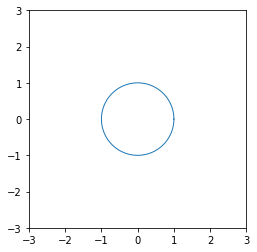

In [20]:
t = np.linspace(0,np.pi*2,100)
pl.plot(np.cos(t), np.sin(t), linewidth=1)
pl.axes().set_xlim(-3,3)
pl.axes().set_ylim(-3,3)
pl.axes().set_aspect('equal')



Let's construct a specfic matrix from eigenvectors and eigenvalues and see how it acts on vectors...

In [26]:
v1 = np.array((1,1))/np.sqrt(2)
v2 = np.array((1,-1))/np.sqrt(2)
lambda1 = 2
lambda2 = 1
print("1st eigenvector: ", v1, "with eigenvalue: ", lambda1)
print("2nd eigenvector: ", v2, "with eigenvalue: ", lambda2)

1st eigenvector:  [ 0.70710678  0.70710678] with eigenvalue:  2
2nd eigenvector:  [ 0.70710678 -0.70710678] with eigenvalue:  1


In [30]:
V=np.column_stack((v1,v2))
print("the matrix V composed of the eigenvectors: \n",V)

the matrix V composed of the eigenvectors: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [31]:
diagLambda=np.diag(np.array((lambda1,lambda2)))
print("the diagonal matrix containing the eigenvalues: \n",diagLambda)

the diagonal matrix containing the eigenvalues: 
 [[2 0]
 [0 1]]


In [35]:
A=np.dot(np.dot(V,diagLambda), np.linalg.inv(V))
print("computing V diag(Lambda) V^-1 \n", A)

computing V diag(Lambda) V^-1 
 [[ 1.5  0.5]
 [ 0.5  1.5]]


In [41]:
print("Computing the eigendecomposition to check: \n")
evals, evecs = np.linalg.eig(A)
print("the eigenvalues")
print(evals)
print("the eigenvectors")
print(evecs)

Computing the eigendecomposition to check: 

the eigenvalues
[ 2.  1.]
the eigenvectors
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [42]:
x=[np.array((np.cos(p), np.sin(p))) for p in np.linspace(0,np.pi*2,100)]
res=np.dot(A,np.transpose(x))

The original vectors on the unit circle


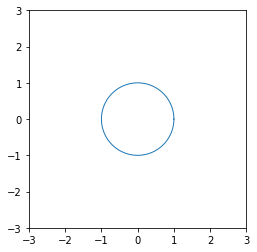

In [43]:
print("The original vectors on the unit circle")
t = np.linspace(0,np.pi*2,100)
pl.plot(np.cos(t), np.sin(t), linewidth=1)
pl.axes().set_xlim(-3,3)
pl.axes().set_ylim(-3,3)
pl.axes().set_aspect('equal')

The transformed vectors after multiplying by the matrix we constructed from the eigenvectors


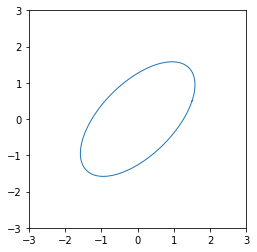

In [44]:
print("The transformed vectors after multiplying by the matrix we constructed from the eigenvectors")
pl.plot(res[0,:],res[1,:], linewidth=1)
pl.axes().set_xlim(-3,3)
pl.axes().set_ylim(-3,3)
pl.axes().set_aspect('equal')

### Eigendecomposition II
- constructing matrices from from eigenvalues and -vectors allows to stretch space in desired directions.
- We usually need to *decompose* a matrix into eigenvalues and eigenvectors to analyze its properties.
- Eigendecomposition does not always exist
    - complex eigenvalues and eigenvectors
- but: every real, symmetric matrix can be decomposed into this form: $$\mathbf{A} = \mathbf{Q}\mathbf{\Lambda} \mathbf{Q}^\top$$
    - $\mathbf{Q}$ is orthogonal composed of eigenvectors from A
    - $\mathbf{\Lambda}$ is diagonal 
    - as we have seen in our construction example...
    - by convention we sort entries of $\mathbf{\Lambda}$ in descending order 



- eigendecomposition may not be unique!
    - if two or more eigenvectors share the same eigenvalue, then every vector lying in their *span* will also be an eigenvector
    - eigendecomposition is unique, only if all eigen*values* are unique

- We can read a lot of information from the decomposition of $\mathbf{A}$
    - the sum of the eigenvalues equals the trace of $\mathbf{A}$
    - the product of the eigenvalues equals the determinant of $\mathbf{A}$
    - $\mathbf{A}$ is singular iff any eigenvalues are zero
    - A matrix whose eigenvalues are all:
        - positive is *positive definite*
        - positive or zero is *positive semidefinite*
        - (and vice versa for negative eigenvalues)
        - positive semidefinite matrices guarantee $\forall \mathbf{x}: \mathbf{x}^\top \mathbf{A} \mathbf{x} \geq 0.$
        - positive definite additionally guarantee $ \mathbf{x}^\top \mathbf{A} \mathbf{x} = 0 \implies \mathbf{x}=\mathbf{0}$

- we often want to optimize a quadratic expression $f(\mathbf{x}) = \mathbf{x}^\top\mathbf{A}\mathbf{x}$ subject to $\lVert\mathbf{x} \rVert = 1$ (on the unit circle):
- the maximum of f within the onstraint region is the maximum eigenvalue and the minimum of f is the minimum eigenvalue (remember the figure).

### Key Ideas
- $ \mathbf{A}\mathbf{v} = \lambda \mathbf{v}$ says that the eigenvectors keep the same direction when multiplied by A
- the sum of the eigenvalues equals the trace of $\mathbf{A}$
- the product of the eigenvalues equals the determinant of $\mathbf{A}$
- eigenvalues determine if $\mathbf{A}$ is positive(negative) (semi) definite

## Singular Value Decomposition
- SVD provides another way to factorize a matrix, into singular values and singular vectors.
    - similar to eigendecomposition but more generally applicable:
        - every real matrix has a singular value decomposition
        - e.g. non-square matrices
    - the eigendecomposition was defined as $$\mathbf{A} = \mathbf{V} diag(\mathbf{\lambda})\mathbf{V}^{-1}$$
    - the SVD now is: $$\mathbf{A} = \mathbf{U} \mathbf{D}\mathbf{V}^{\top}$$
        - if $\mathbf{A}$ is $m \times n$ then $\mathbf{U}$ is $m \times m$, $\mathbf{D}$ is $m \times n$ and $\mathbf{V}$ is $n \times n$
      

   $$\mathbf{A} = \mathbf{U} \mathbf{D}\mathbf{V}^{\top}$$
       
- each matrix has a special structure: 
    - $\mathbf{U}$ and $\mathbf{V}$ are orthogonal, the columns of $\mathbf{U}$ are the *left-singular vectors* and the columns of $\mathbf{V}$ are the *right-singular vectors*
    - $\mathbf{D}$ is diagonal, elements along diagonal are the *singular values* 
- the connection between SVD and eigendecomposition:
    - the left-singular vectors are the eigenvectors of $\mathbf{A}\mathbf{A}^\top$
    - the right-singular vectors are the eigenvectors of $\mathbf{A}^\top\mathbf{A}$
    - the non-zero singular values are the *square roots* of the eigenvalues of $\mathbf{A}^\top\mathbf{A}$ (the same is true for $\mathbf{A}\mathbf{A}^\top$)

### Key Ideas
- SVD factors $\mathbf{A}$ into  $\mathbf{U} \mathbf{D}\mathbf{V}^{\top}$
- the squared singular values are the nonzero eigenvalues of $\mathbf{A}^\top\mathbf{A}$ and $\mathbf{A}\mathbf{A}^\top$
- the orthonormal columns of $\mathbf{U}$ and $\mathbf{V}$ are the eigenvectors of $\mathbf{A}\mathbf{A}^\top$ and $\mathbf{A}^\top\mathbf{A}$

## The Moore-Penrose Pseudoinverse
- inversion not defined for matrices that are not square
- We need a (left-)inverse $\mathbf{B}$ of $\mathbf{A}$ to solve $$\mathbf{A}\mathbf{x}=\mathbf{y}$$ by left-multiplying to get: $$\mathbf{x}= \mathbf{B}\mathbf{y}$$
    - this may not always work!
        - if $\mathbf{A}$ is taller than wide, we might not get a solution (more equations than unkowns)
        - if $\mathbf{A}$ is wider than tall, there could be multiple solutions (more unkowns than equations).

- This is where we need the Moore-Penrose pseudoinverse to get one (principle) solution: 
    - $ \mathbf{A}^{+} = \lim_{\alpha \to 0}(\mathbf{A}^\top\mathbf{A} + \alpha \mathbf{I})^{-1}\mathbf{A}^\top $
    - typically computed using the singular value decomposition: $\mathbf{A}^{+}=\mathbf{V}\mathbf{D}^{+}\mathbf{U}^\top $
- If A is wider than tall (*more unkowns than equations*):
    - we get the solution with minimal Euclidean norm among all possible solutions.
- If A is taller than wide (*more equations than unkowns*) and there is no solution:
    - we get the least squares solution $\mathbf{x}$, i.e. $\mathbf{A}\mathbf{x}$ is as close as possible to $\mathbf{y}$ in terms of Euclidean norm.)

## The Trace Operator
- gives the sum of the diagonal elements: $$Tr(\mathbf{A})=\sum_{i}A_{i,i} $$
    - remember: it is the sum of the eigenvalues
    - some operations are difficult to specify without summation notation can be written in matrix products and trace operations:
        - e.g. $\lVert \mathbf{A} \rVert = \sqrt{Tr(\mathbf{A}\mathbf{A}^\top)} $
        - trace is invariant to transposition $Tr(\mathbf{A})==Tr(\mathbf{A}^\top)$
        - $Tr(\mathbf{A}\mathbf{B}\mathbf{C})=Tr(\mathbf{C}\mathbf{A}\mathbf{B})=Tr(\mathbf{B}\mathbf{C}\mathbf{A})$
            - invariant to cyclic permutations
        - a scalar is its own trace $a = Tr(a)$

## The Determinant
- the determinant of a square matrix $\det(A)$ is a function (from matrices to real scalars)
    - remember: it is equal to the product of eigenvalues
- absolute value of determinant measures how multiplication with $\mathbf{A}$ expands or contracts space
    - if it is 1 , the transformation is volume preserving
        - e.g. deformation fields in registrations (determinant of the Jacobian)
    - if it is 0, all space is contracted (at least in one dimension).

## a final note: Tensors
- a 'generalization' of scalars, vectors, matrices: 
    - an array of numbers arranged in a grid with variable number of axis 
- e.g. $A_{i,j,k}$ 
    - would need _three_ indices per entry

## References 

![Goodfellow, Bengio, Courville - Chapter 2](https://images.gr-assets.com/books/1478212695l/30422361.jpg)


![Strang - Linear Algebra](https://images-na.ssl-images-amazon.com/images/I/41Mf6xABXtL.jpg)

## A nice (and somewhat long) example to test your understanding of linear algebra: PCA!
[the last part of chapter 2 from Goodfellow book](http://www.deeplearningbook.org/contents/linear_algebra.html)